In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
from matplotlib import gridspec

In [20]:
sales_df = pd.read_excel('data/Grupo_4.xlsx', sheet_name=['Santa Ana','La Floresta'])
sales_df['La Floresta']

,Fecha,Ventas
0,2023-01-01,16298.062460
1,2023-01-02,18711.283012
2,2023-01-03,19788.792981
3,2023-01-04,22003.462132
4,2023-01-05,20387.799178
...,...,...
360,2023-12-27,23014.794169
361,2023-12-28,22825.600188
362,2023-12-29,19173.296859
363,2023-12-30,22544.923294


In [21]:
# Agregamos dia de la semana y mes
for element in sales_df.values():
    element['Mes'] = element.Fecha.dt.month
    element['Dia Semana'] = element.Fecha.dt.day_of_week # 0=Monday and 6 Sunday


In [31]:
sales_df['La Floresta']


,Fecha,Ventas,Mes,Dia Semana
0,2023-01-01,16298.062460,1,6
1,2023-01-02,18711.283012,1,0
2,2023-01-03,19788.792981,1,1
3,2023-01-04,22003.462132,1,2
4,2023-01-05,20387.799178,1,3
...,...,...,...,...
360,2023-12-27,23014.794169,12,2
361,2023-12-28,22825.600188,12,3
362,2023-12-29,19173.296859,12,4
363,2023-12-30,22544.923294,12,5


In [23]:
def generate_distribution(sales_df, column_name='Ventas'):
    fig = plt.figure(figsize=(12,6))
    gs = gridspec.GridSpec(ncols=len(sales_df), nrows=1, figure=fig)
    for index, key in enumerate(sales_df):
        ax1 = fig.add_subplot(gs[0, index])
        sns.ecdfplot(sales_df[key][column_name])
        ax1.set_title(key + " " + column_name)
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
#     ax2 = fig.add_subplot(gs[0,1])
#     sns.ecdfplot(sales_df['La Floresta']['Ventas'])
#     ax2.set_title('Ventas La Floresta')

    plt.tight_layout()
    plt.show()

In [34]:
sales_df['Santa Ana'][sales_df['Santa Ana']['Mes'] == 1]


,Fecha,Ventas,Mes,Dia Semana
0,2023-01-01,11390.705369,1,6
1,2023-01-02,16122.907022,1,0
2,2023-01-03,19609.303029,1,1
3,2023-01-04,16734.047386,1,2
4,2023-01-05,17983.552354,1,3
5,2023-01-06,17807.001923,1,4
6,2023-01-07,12287.229202,1,5
7,2023-01-08,13428.794375,1,6
8,2023-01-09,11088.125026,1,0
9,2023-01-10,14142.304273,1,1


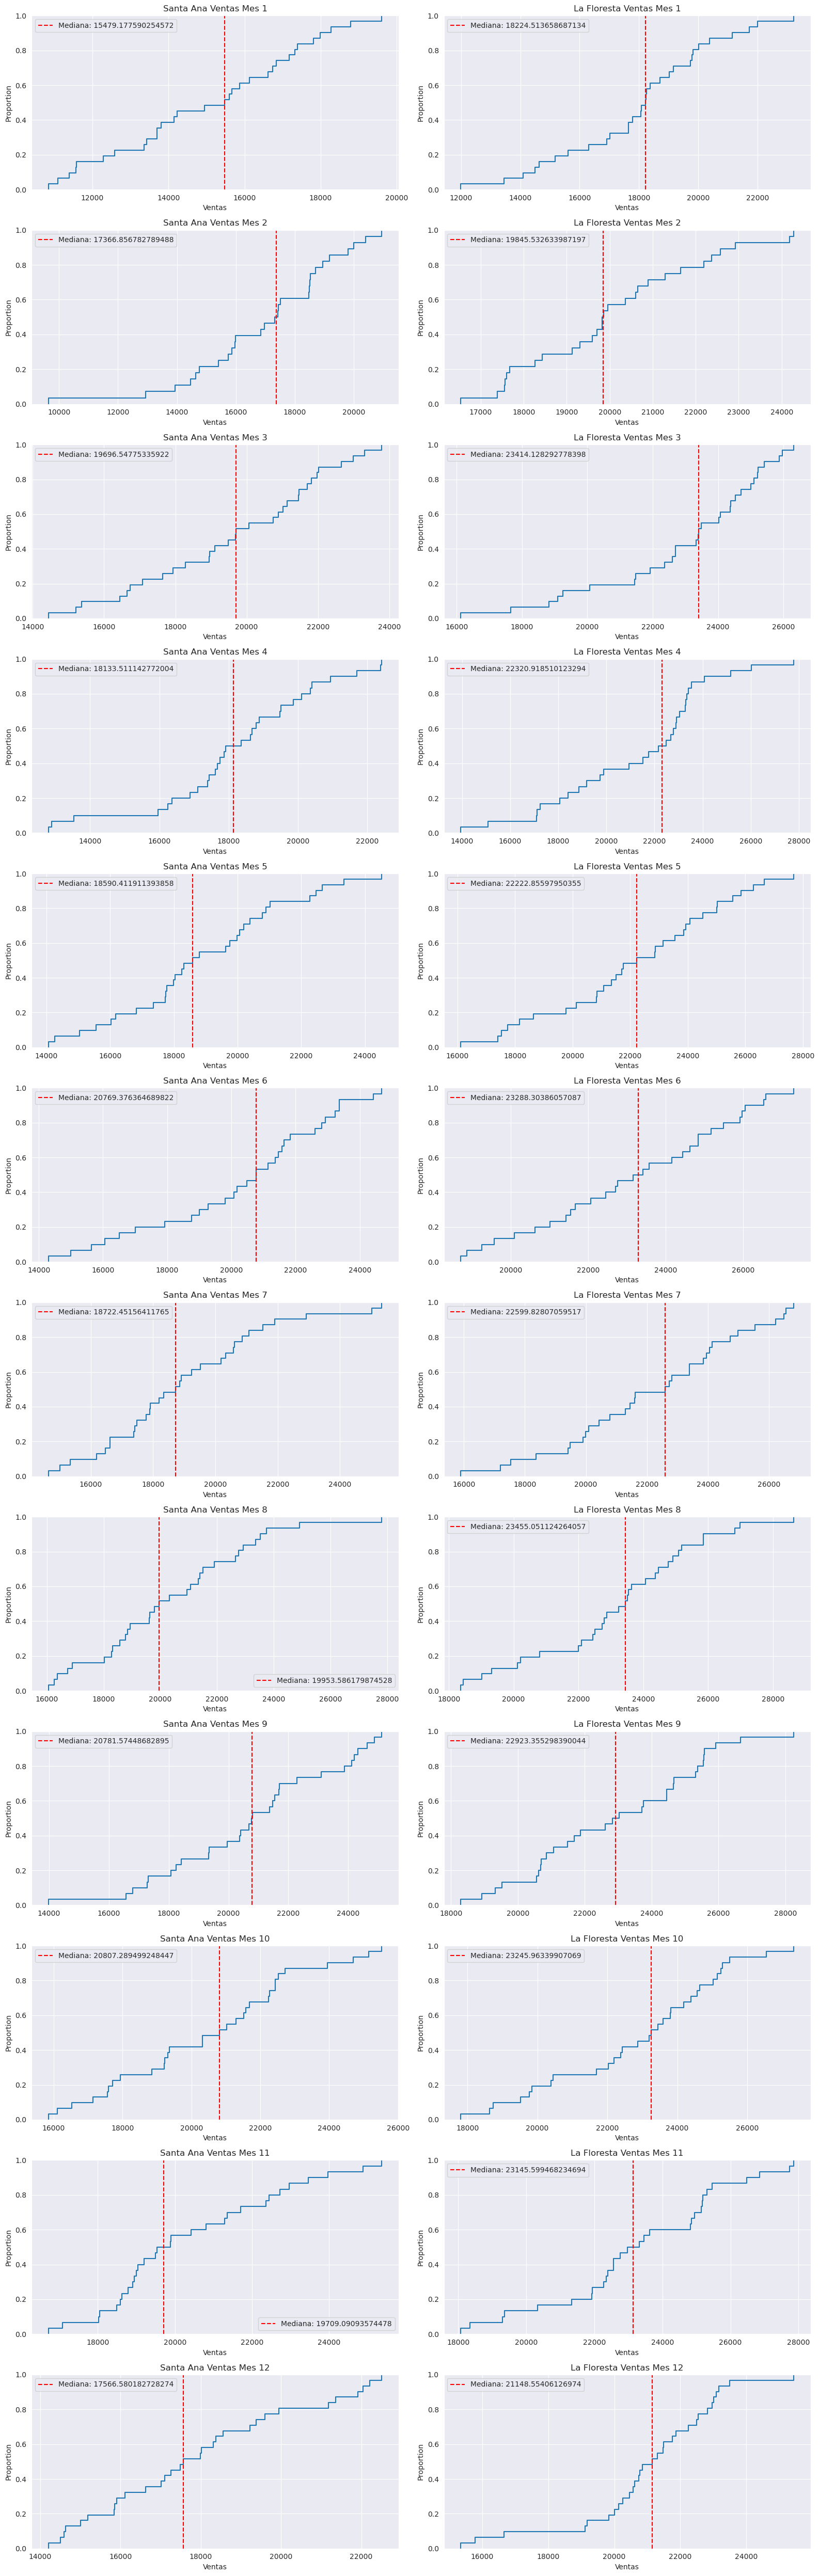

In [54]:
# Mensual
sales_by_month = dict()
fig = plt.figure(figsize=(16,50))
gs = gridspec.GridSpec(ncols=len(sales_df), nrows=12, figure=fig)
for index, key in enumerate(sales_df):
    for i in range(1,13,1):
        ax1 = fig.add_subplot(gs[ i-1, index])
        data = sales_df[key][sales_df[key]['Mes'] == i]['Ventas']
        sns.ecdfplot(data)
        median = np.median(data)
        ax1.axvline(x=median, color='r', linestyle='--', label=f'Mediana: {median}')
        ax1.set_title(key + " Ventas Mes " + str(i))
        ax1.legend()
        
        # sales_by_month.update({key:sales_df[key].drop(columns=['Fecha', 'Dia Semana']).groupby(by=['Mes']).sum().reset_index()})

plt.tight_layout()
plt.show()

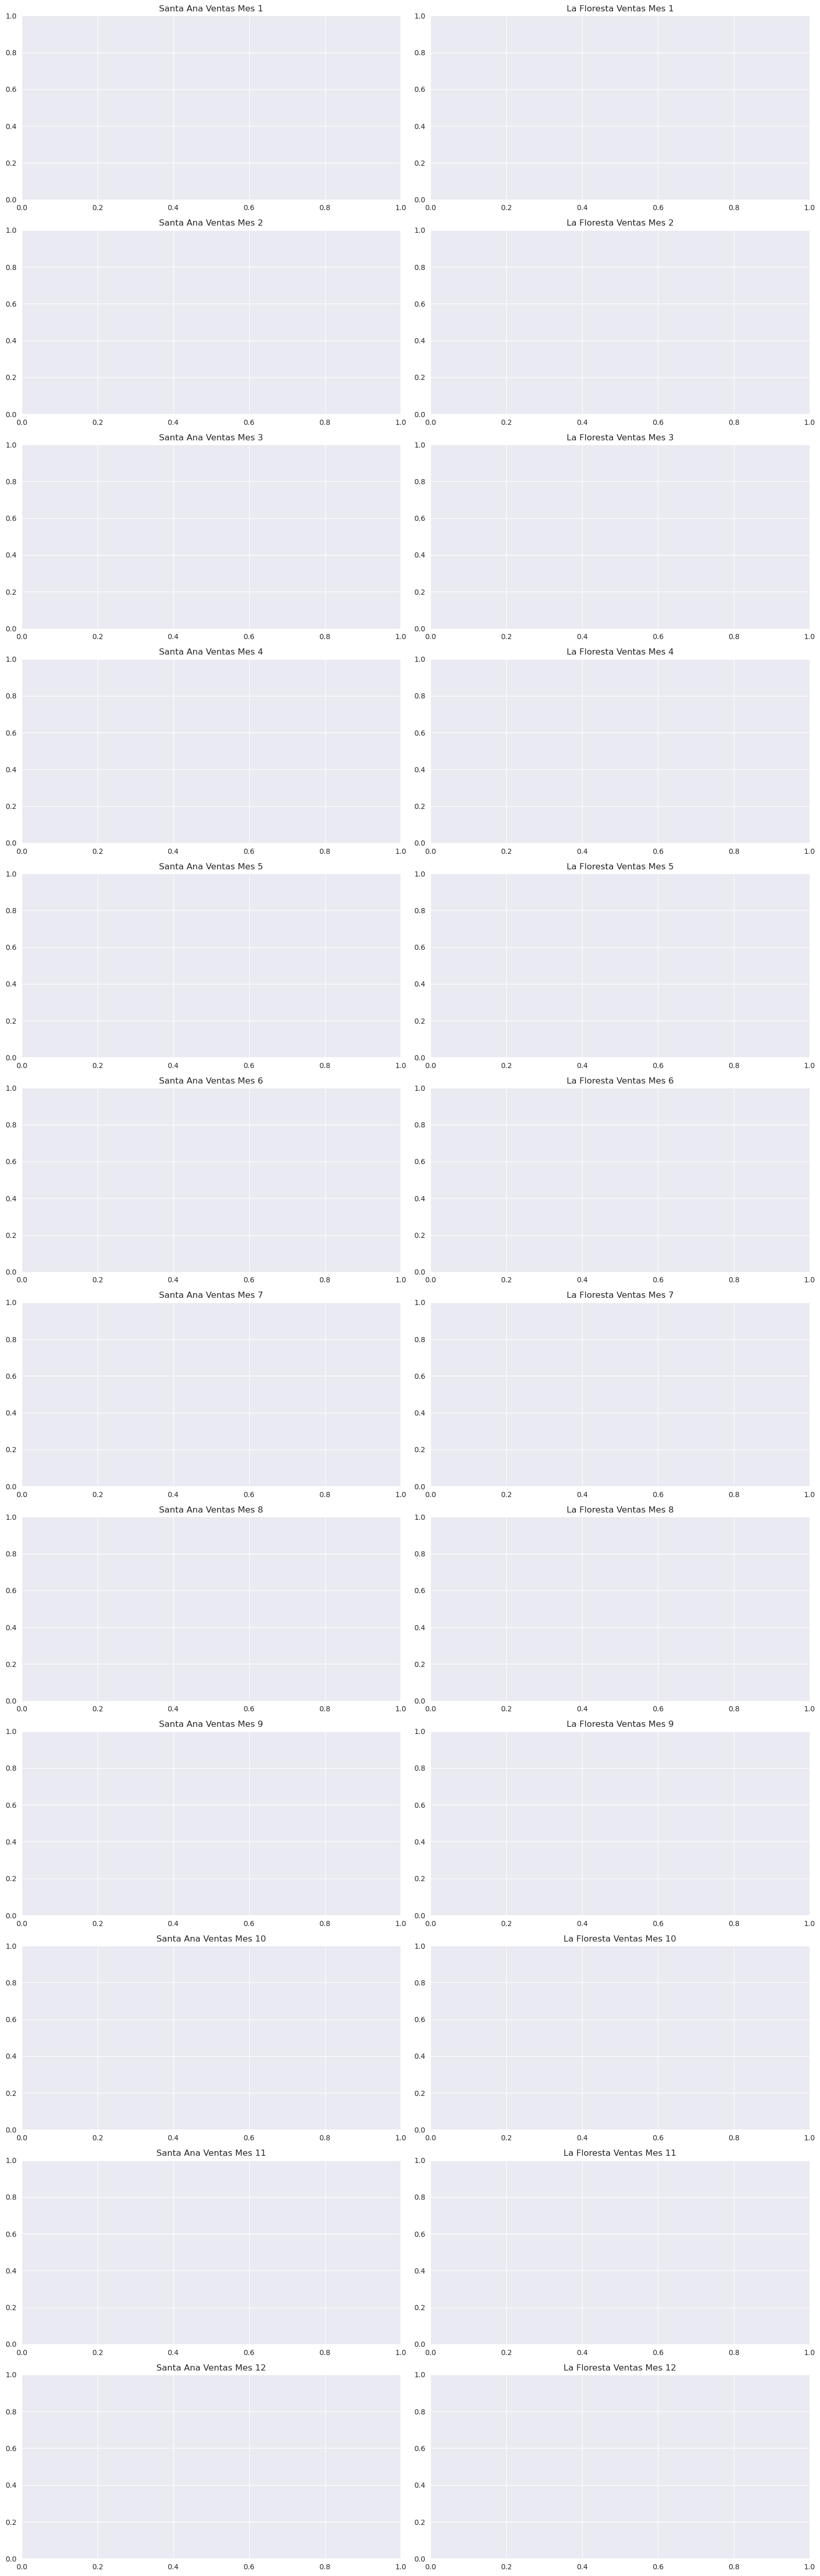

In [73]:
# Mensual
bins=20
sales_by_month = dict()
fig = plt.figure(figsize=(16,50))
gs = gridspec.GridSpec(ncols=len(sales_df), nrows=12, figure=fig)
for index, key in enumerate(sales_df):
    for i in range(1,13,1):
        ax1 = fig.add_subplot(gs[ i-1, index])
        data = sales_df[key][sales_df[key]['Mes'] == i]
        
        h = (data.max()-data.min())/bins
        # sns.histplot(data, kde=True, stat='density', binwidth=h)
        p = so.Plot(data, x='Ventas')
        # p.add(so.Area(), so.KDE())
        ax1.set_title(key + " Ventas Mes " + str(i))
        
        # sales_by_month.update({key:sales_df[key].drop(columns=['Fecha', 'Dia Semana']).groupby(by=['Mes']).sum().reset_index()})

plt.tight_layout()
plt.show()

In [74]:
# generate_distribution(sales_by_month, 'Ventas')

In [27]:
# Mensual
sales_by_day = dict()
for key in sales_df:
    sales_by_day.update({key:sales_df[key].drop(columns=['Fecha', 'Mes']).groupby(by=['Dia Semana']).sum().reset_index()})


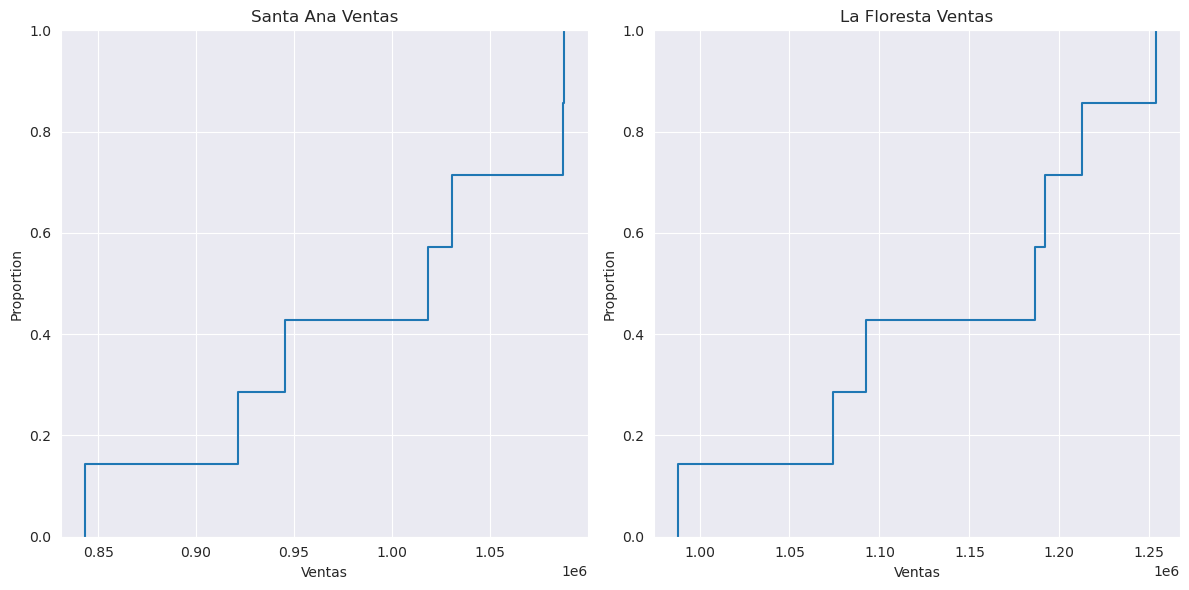

In [28]:
generate_distribution(sales_by_day, 'Ventas')

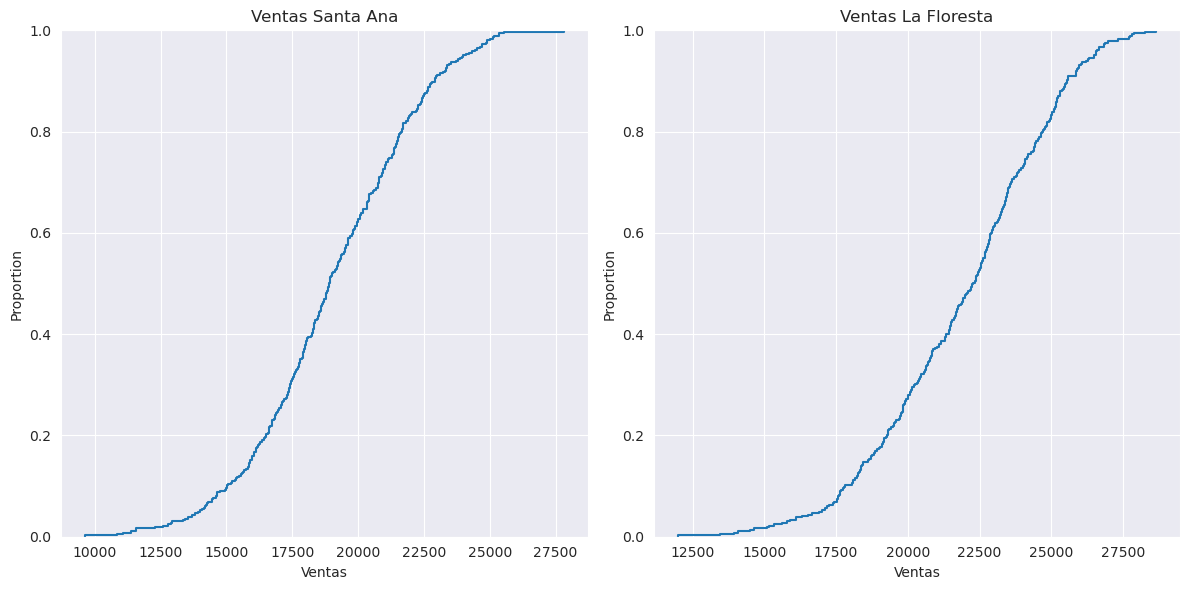

In [29]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
sns.ecdfplot(sales_df['Santa Ana']['Ventas'])
ax1.set_title('Ventas Santa Ana')
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
ax2 = fig.add_subplot(gs[0,1])
sns.ecdfplot(sales_df['La Floresta']['Ventas'])
ax2.set_title('Ventas La Floresta')

plt.tight_layout()
plt.show()

In [30]:
sales_ordered = sales_df[0].sort_values(by='Ventas', ascending=True).reset_index()
plt.plot(sales_ordered['Ventas'], (sales_ordered['Ventas'].index+1)/sales_ordered['Ventas'].size, scaley=False)
sales_ordered['Ventas']

KeyError: 0

In [ ]:
sns.histplot(sales_ordered['Ventas'], kde=True)

In [ ]:
#Ventas Mensuales
sales_by_month = sales_df[0].drop(columns=['Fecha']).groupby(by=['Mes']).sum().reset_index()
sales_by_month_orderer = sales_by_month.sort_values(by='Ventas', ascending=True).reset_index(drop=True)
plt.step(sales_by_month_orderer['Ventas'], (sales_by_month_orderer.index+1)/sales_by_month_orderer.Ventas.size)
sales_by_month_orderer.size

In [ ]:
sns.histplot(sales_by_month_orderer['Ventas'], bins=10)